In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Membaca dataset dan mengubah menjadi dataframe
df = pd.read_csv('https://raw.githubusercontent.com/mzakibhr/K-Means-Clustering/main/Mall_Customers.csv')

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
# Ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# Ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [46]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [47]:
# Mendrop kolom customer id dan gender
x = df.drop(['CustomerID', 'gender'], axis=1)

#Membuat list yang berisi inersia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inersia')

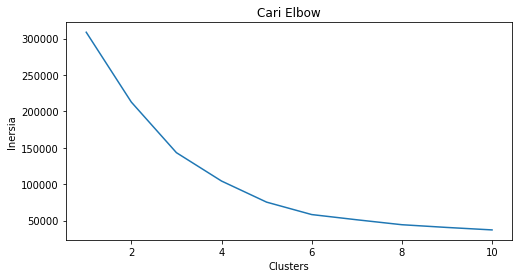

In [48]:
# Membuat plot inersia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inersia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


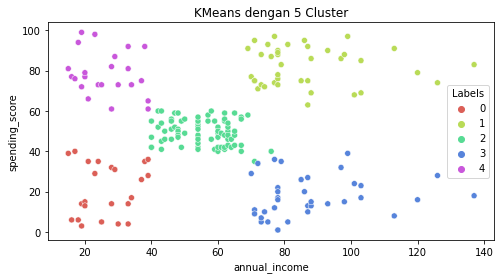

In [54]:
# Membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)

# Menambahkan kolom label pada dataset
x['Labels'] = km5.labels_

# Membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()